In [1]:
using DelimitedFiles, Plots, Statistics

using CurveFit, LaTeXStrings

Plots.default(
    grid = true,
    size = (400,400),
    fontfamily="serif-roman", 
    labelfontsize=15,
    titlefontsize =12,
    xguidefontsize=15,
    yguidefontsize=15,
    xtickfontsize=12,
    ytickfontsize=12,
    markerstrokewidth = 1,        # border around dots
#    markersize = 3
)

TIT = "T=8, λ=1.0, γ=0.006, N=500000"


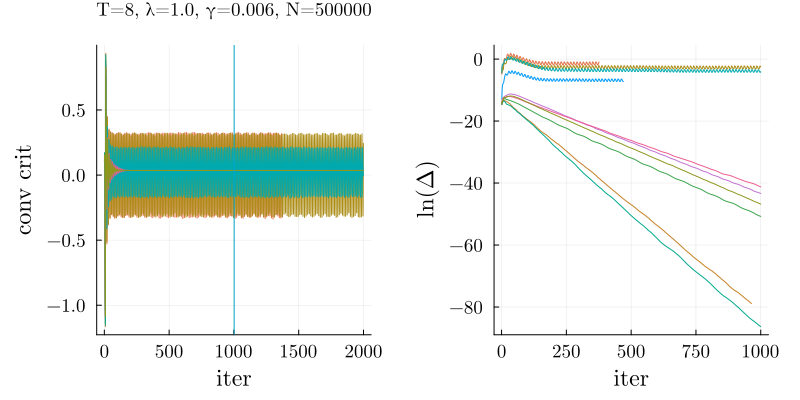

In [2]:
# read 1 gamma value, all runs

#path = "tmp_stab/res_epid_stab/"
#nam="fileres_epid_stab"
path = "tmp_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"

extension ="_SIG00.000001_run" 
#extension ="_run"  

T=8
LAM=1.0
GAM=0.006
N=500000
iter=2000
halfiter=Int64(iter/2)+2
numruns = 1:10

TIT = "T="*string(T)*", λ="*string(LAM)*", γ="*string(GAM)*", N="*string(N)
@show TIT
foldergam="gam"*string(GAM)*"/"
nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
pconv=plot(xaxis="iter", yaxis="conv crit", title=TIT);
pd1 = plot(xaxis="iter", yaxis="ln(Δ)");

for nrun in numruns
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
    iter_err = findall([(!isinf(res[j,2])&&!isnan(res[j,2])) for j in iter_full])
    iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
    iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
    log_Δ = log.(res[iter_Δ,3])
    plot!(pconv,res[iter_full,2], label="")
    plot!(pd1, log_Δ, label="")
end
vline!(pconv, [halfiter], label="")
pγ= plot(pconv, pd1, size=(800,400), layout=(1,2), margin=6*Plots.mm)

sfitΔ = 0.9630569157033103


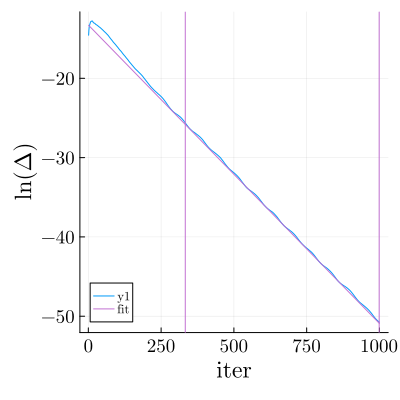

In [3]:
nrun = 3
namefile = path*foldergam*nam*nameparams*extension*string(nrun)
file = readdlm(namefile);
res = file[4:end,1:3]
iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
iter_err = findall([(!isinf(res[j,2])&&!isnan(res[j,2])) for j in iter_full])
iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
log_Δ = log.(res[iter_Δ,3])

pΔ = plot(xaxis="iter", yaxis="ln(Δ)");
plot!(pΔ, log_Δ)
frac_cut = 3
lsta = Int64(round(length(iter_Δ)/frac_cut))
lend = length(iter_Δ)-1#-lsta
log_Δ_cut = log_Δ[lsta:lend]
(a,b)=linear_fit(lsta:lend, log_Δ_cut)
sfitΔ = exp(b)
@show sfitΔ
lmid=Int64(round((lsta+lend)/2))
diff_fit = b*lmid - log_Δ[lmid]  
vline!(pΔ, [lsta], color=4, label="")
vline!(pΔ, [lend], color=4, label="")    
plot!(pΔ, b.*(1:length(iter_Δ)).-diff_fit, label="fit")

plot(pΔ)

In [ ]:
# Set params: popdyn - right

path = "tmp_stab/res_epid_stab/"
nam="fileres_epid_stab"
extension ="_SIG00.0001_run" 
#extension ="_run"  

ext_plot_title = "popdyn_right"

T=8
LAM=1.0
N=50000
iter=500
halfiter=Int64(iter/2)+2
runs_range=1:10

γ_range = [0.014, 0.01475, 0.015, 0.01525, 0.0155, 0.01575, 0.016, 
    0.01625, 0.0165, 0.017, 0.0175, 0.018] 
γ_range = γ_range[2:end]

In [2]:
# Set params: 1graph - right

path = "tmp_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"
extension = "_SIG00.000001_run"
#extension ="_run"  

ext_plot_title = "graph_right"

T=8
LAM=1.0
N=500000
iter=2000
halfiter=Int64(iter/2)+2
runs_range=1:10

#γ_range = [0.00975, 0.01, 0.01025, 0.0105, 0.01075, 0.011, 0.0115]
γ_range = [0.01025, 0.0105, 0.011, 0.0115, 0.012, 0.0125, 0.013]


7-element Vector{Float64}:
 0.01025
 0.0105
 0.011
 0.0115
 0.012
 0.0125
 0.013

In [ ]:
# Set params: popdyn - left

path = "tmp_stab/res_epid_stab/"
nam="fileres_epid_stab"
extension = "_SIG00.000001_run"
#extension ="_run"  

ext_plot_title = "popdyn_left"

T=8
LAM=1.0
N= 500000
iter=500
halfiter=Int64(iter/2)+2
runs_range=1:10

γ_range = [0.00525, 0.005275, 0.0053, 0.005325, 0.00535, 0.005375, 0.0054, 0.005425, 0.00545]
γ_range = γ_range[1:end-1]


In [4]:
# Set params: 1graph - left

path = "tmp_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"
extension = "_SIG00.000001_run"
#extension ="_run"  

ext_plot_title = "graph_left"

T=8
LAM=1.0
N=500000
iter=2000
halfiter=Int64(iter/2)+2
runs_range=1:10

#γ_range = [0.00525, 0.0054, 0.0055, 0.0056, 0.0057, 0.00575,
#    0.0058, 0.0059, 0.006, 0.0061] 
#γ_range = γ_range[5:8]
γ_range = [0.0056, 0.0057, 0.0058, 0.00585, 0.0059, 0.00595, 0.006, 0.00605]

8-element Vector{Float64}:
 0.0056
 0.0057
 0.0058
 0.00585
 0.0059
 0.00595
 0.006
 0.00605

In [13]:
# Loop on gamma

gam_res = zeros(length(γ_range), length(runs_range));
std_F_res = zeros(length(γ_range), length(runs_range));
diffmean_F_res = zeros(length(γ_range), length(runs_range));
for iγ in 1:length(γ_range)
    GAM=γ_range[iγ]
        
    for irun in 1:length(runs_range)
        run=runs_range[irun]
        foldergam="gam"*string(GAM)*"/"
        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        namefile = path*foldergam*nam*nameparams*extension*string(run)

        file = readdlm(namefile);
        res = file[4:end,1:3]
        iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
        iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
        iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])

        lend_err = iter_full[end]
        if lend_err > 400
            diffmean_F = mean(res[lend_err-400:lend_err-200,2])-mean(res[lend_err-100:lend_err,2])
            std_F = std(res[end-400:lend_err,2])
        else
            diffmean_F = NaN
            std_F = NaN
        end
        
        frac_cut = 3
        lsta = Int64(round(length(iter_Δ)/frac_cut))
        lend = length(iter_Δ)-1
        #@show GAM, irun, lsta, lend, diffmean_F
        if lend-lsta>30 && length(iter_Δ)>0 && abs(std_F) > 10^(-2) 
            frac_cut = 3
            log_Δ = log.(res[iter_Δ,3])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            sfitΔ=NaN
        end
        gam_res[iγ,irun]=sfitΔ
        std_F_res[iγ,irun]=std_F
        diffmean_F_res[iγ,irun]=diffmean_F
    end
end

mean_gam = zeros(length(γ_range))
std_gam = zeros(length(γ_range))

mean_errF = zeros(length(γ_range))
std_errF = zeros(length(γ_range))

mean_diffmean_F = zeros(length(γ_range))
std_diffmean_F = zeros(length(γ_range))

for iγ in 1:length(γ_range)
    indicesconv=.!isnan.(gam_res[iγ,:])
    
    println("γ=", γ_range[iγ], "\t nc=", sum(indicesconv))
    
    mean_gam[iγ] = mean(gam_res[iγ,indicesconv])
    std_gam[iγ] = std(gam_res[iγ,indicesconv])

    mean_errF[iγ] = mean(std_F_res[iγ,indicesconv])
    std_errF[iγ] = std(std_F_res[iγ,indicesconv])

    mean_diffmean_F[iγ] = mean(diffmean_F_res[iγ,indicesconv])
    std_diffmean_F[iγ] = std(diffmean_F_res[iγ,indicesconv])
   
end

γ=0.0056	 nc=0
γ=0.0057	 nc=0
γ=0.0058	 nc=0
γ=0.00585	 nc=0
γ=0.0059	 nc=2
γ=0.00595	 nc=2
γ=0.006	 nc=4
γ=0.00605	 nc=5


In [14]:
std_F_res[6,:]

10-element Vector{Float64}:
 1.0916395364759312e-13
 1.0907893593326744e-13
 0.1485739158699303
 1.0877218367521414e-13
 1.0703728676837455e-13
 0.08837138176729234
 1.0677282933378607e-13
 1.0648020171520259e-13
 1.1109122495662023e-13
 1.0864205159463787e-13

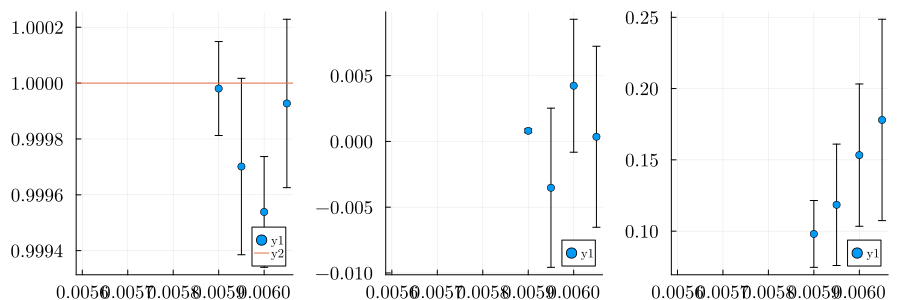

In [15]:
# Plot results

p1 = scatter(γ_range, mean_gam, err=std_gam)
hline!(p1, [1])
p2 = scatter(γ_range, mean_diffmean_F, err=std_diffmean_F)
p3 = scatter(γ_range, mean_errF, err=std_errF)
plot(p1, p2, p3, layout=(1,3), size=(900, 300))


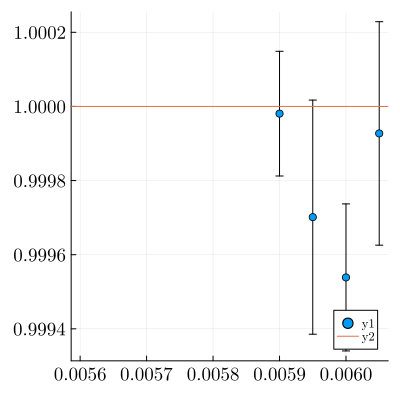

In [16]:
p1

In [17]:
# Fit:

# Fit: popdyn - right
#pts_fit= 1:length(γ_range)

# Fit: popdyn - left
#pts_fit= 1:length(γ_range)

# Fit: 1graph - right
#pts_fit= vcat(1:2, 4:7) #1:length(γ_range)

# Fit: 1graph - left
pts_fit= 3:length(γ_range)



3:6

solm = 0.00602547397841392


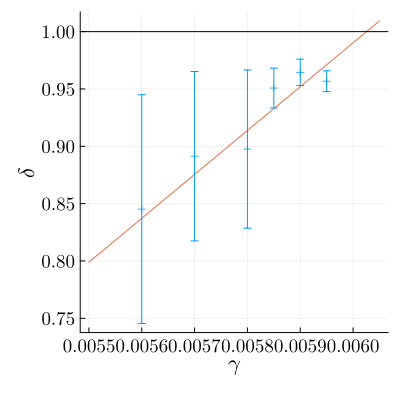

In [18]:
#linear fit
(a0,a1)=linear_fit(γ_range[pts_fit], mean_gam[pts_fit])
solm = (1-a0)/a1
@show solm

fit_range_plot= (γ_range[pts_fit[1]]-0.0003):0.000001:(γ_range[pts_fit[end]]+0.0001)
pγ = plot(xlabel=L"\gamma", ylabel=L"\delta")
plot!(pγ, fit_range_plot, a1.*fit_range_plot .+ a0, 
    label="", linewidth=1, color=2)
scatter!(γ_range, mean_gam, err=std_gam, 
    label="", markershape=:cross, markerstrokecolor=:1, markerstrokewidth=1, color=1)
hline!(pγ, [1], label="", color="black")


In [ ]:
# quadratic fit
(a0,a1,a2)=poly_fit(γ_range[pts_fit], mean_gam[pts_fit], 2)
@show a0, a1, a2
discrim=a1^2-4*a2*(a0-1)
solm, solp = (-a1-sqrt(discrim))/(2*a2), (-a1+sqrt(discrim))/(2*a2)
@show solm, solp
fit_range_plot= (γ_range[1]):0.000001:(γ_range[end])

pγ = plot(xlabel=L"\gamma", ylabel=L"\delta")
plot!(pγ, fit_range_plot, a2.*fit_range_plot.*fit_range_plot .+ a1.*fit_range_plot .+ a0, 
    label="", linewidth=1, color=2)
scatter!(γ_range, mean_gam, err=std_gam, 
    label="", markershape=:cross, markerstrokecolor=:1, markerstrokewidth=1, color=1)
hline!(pγ, [1], label="", color="black")


In [ ]:
savefig(pγ, "stav_crit_"*ext_plot_title*"_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

In [ ]:
pconv = plot(xlabel=L"γ", ylabel=L"\langle F \ \rangle_1 - \langle F \ \rangle_2")
scatter!(pconv, γ_range, mean_diffmean_F, err=std_diffmean_F, label="")
hline!(pconv, [0], label="", color="black")
vline!(pconv, [solm], label="", color=2)

In [ ]:
savefig(pconv, "conv_crit_"*ext_plot_title*"_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

In [ ]:
# read single run free-energy

path = "tmp_stab/res_epid_stab/"
nam="fileres_epid_stab"
#path = "tmp_stab/res_epid_1graph_stab/"
#nam="fileres_epid_1graph_stab"

extension ="_SIG00.0001_run" 
#extension ="_run"  

T=8
LAM=1.0
N=50000
iter=500

pF=plot(xaxis="iterations", yaxis="free-energy");

nrun = 1
for GAM in [0.015, 0.017]
    foldergam="gam"*string(GAM)*"/"
    nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
    plot!(pF,res[iter_full,2], label=L"γ="*string(GAM) )
end
plot!(pF, [100,100], [0.2,0.4], label="", alpha=0.5, color="black")
plot!(pF, [300,300], [0.2,0.4], label="", alpha=0.5, color="black")
plot!(pF, [500,500], [0.2,0.4], label="", alpha=0.5, color="black")
plot!(pF, [100,300],[0.2,0.2], arrow=:both, label="", alpha=0.5, color="black")
plot!(pF, [300,500],[0.2,0.2], arrow=:both, label="", alpha=0.5, color="black")
annotate!(pF, 200, 0.17, L"\langle F \ \rangle_1")
annotate!(pF, 400, 0.17, L"\langle F \ \rangle_2")
pF

In [ ]:
savefig(pF, "free_energy_fluctuations_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

In [ ]:
# read single run stability parameter - with pop dyn

path = "tmp_stab/res_epid_stab/"
nam="fileres_epid_stab"


T=8
LAM=1.0
GAM=0.016
iter=500
N= 50000

exts = ["_run", "_SIG00.0001_run"] 
labels = [L"\sigma_0=10^{-2}", L"\sigma_0=10^{-4}"]
colors=[2,1]

pΔ=plot(xaxis=L"t", yaxis=L"\ln(\Delta(t))", ylims=(-50,40));

nrun = 1
for i in 1:2
    extension = exts[i]
    lab = labels[i]
    foldergam="gam"*string(GAM)*"/"
    nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=10:sum(typeof.(res[:,2]).!=SubString{String})
    iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
    iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
    log_Δ = log.(res[iter_Δ,3])
    plot!(pΔ, log_Δ, label=lab, color=colors[i])
end
pΔ


In [ ]:
savefig(pΔ, "ΔversusIter_T"*string(T)*"_λ"*string(LAM)*"_γ"*string(GAM)*"_N"*string(N)*".pdf")

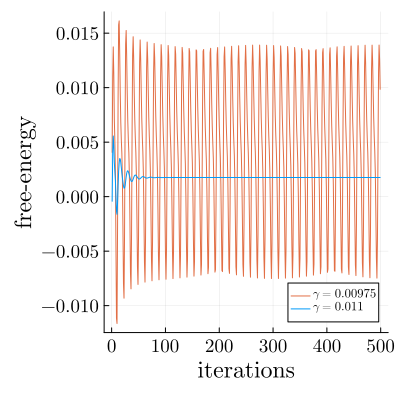

In [19]:
# read single run free-energy - on one graph

path = "tmp_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"

extension ="_SIG00.000001_run" 
#extension ="_run"  

T=8
LAM=1.0
N=500000
iter=500

pF=plot(xaxis="iterations", yaxis="free-energy");
gamvals = [0.00975, 0.011]
colors = [2,1]
nrun = 1

for i in 1:2
    GAM=gamvals[i]
    foldergam="gam"*string(GAM)*"/"
    nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
    plot!(pF,res[iter_full,2], label=L"γ="*string(GAM), color=colors[i])
end
#plot!(pF, [100,100], [0.2,0.4], label="", alpha=0.5, color="black")
#plot!(pF, [300,300], [0.2,0.4], label="", alpha=0.5, color="black")
#plot!(pF, [500,500], [0.2,0.4], label="", alpha=0.5, color="black")
#plot!(pF, [100,300],[0.2,0.2], arrow=:both, label="", alpha=0.5, color="black")
#plot!(pF, [300,500],[0.2,0.2], arrow=:both, label="", alpha=0.5, color="black")
#annotate!(pF, 200, 0.17, L"\langle F \ \rangle_1")
#annotate!(pF, 400, 0.17, L"\langle F \ \rangle_2")
pF

In [ ]:
savefig(pF, "free_energy_fluctuations_onegraph_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

In [ ]:
# read single run stability parameter - on one graph

path = "tmp_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"


T=8
LAM=1.0
GAM=0.012
iter=2000
N= 500000
extension = "_SIG00.000001_run"
lab= ""

pΔ=plot(xaxis=L"t", yaxis=L"\ln(\Delta(t))");

nrun = 1

foldergam="gam"*string(GAM)*"/"
nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
namefile = path*foldergam*nam*nameparams*extension*string(nrun)
file = readdlm(namefile);
res = file[4:end,1:3]
iter_full=10:sum(typeof.(res[:,2]).!=SubString{String})
iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
log_Δ = log.(res[iter_Δ,3])
plot!(pΔ, log_Δ[1:250], label=lab)
pΔ


In [ ]:
pΔinset=plot(pγ)
plot!(pΔinset, log_Δ[1:250], label=L"\ln(\Delta(t))",
    inset = (1, bbox(0.65,0.08,0.35,0.35,:left)), subplot = 2,
    xticks=0:100:200, yticks=0:-20:-60)

In [ ]:
savefig(pΔinset, "stav_crit_"*ext_plot_title*"_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")